# Training log

Segmentation performance on the validation set through training

In [1]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
theme_set(theme_light())

In [3]:
data <- read_csv("../model/train_log.csv") %>% mutate(epoch = row_number())

Rows: 200 Columns: 8

── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): epoch, train_loss, valid_loss, acc_seg, diceComb, diceLV, diceMY
time (1): time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
data %>% head

epoch,train_loss,valid_loss,acc_seg,diceComb,diceLV,diceMY,time
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>
1,0.03266186,0.013872641,0.9950370,0.7625955,0.7824145,0.6849113,00:14:00
2,0.02156131,0.010528187,0.9958261,0.8026272,0.8091252,0.7226815,00:14:00
3,0.01619930,0.010494048,0.9958357,0.8108134,0.8254690,0.7332511,00:14:00
4,0.01369094,0.009148108,0.9962475,0.8103776,0.8307044,0.7342775,00:14:00
5,0.01196199,0.009429042,0.9962047,0.8371721,0.8343520,0.7650846,00:14:00
6,0.01098289,0.009129192,0.9962140,0.8386665,0.8280198,0.7590873,00:14:00


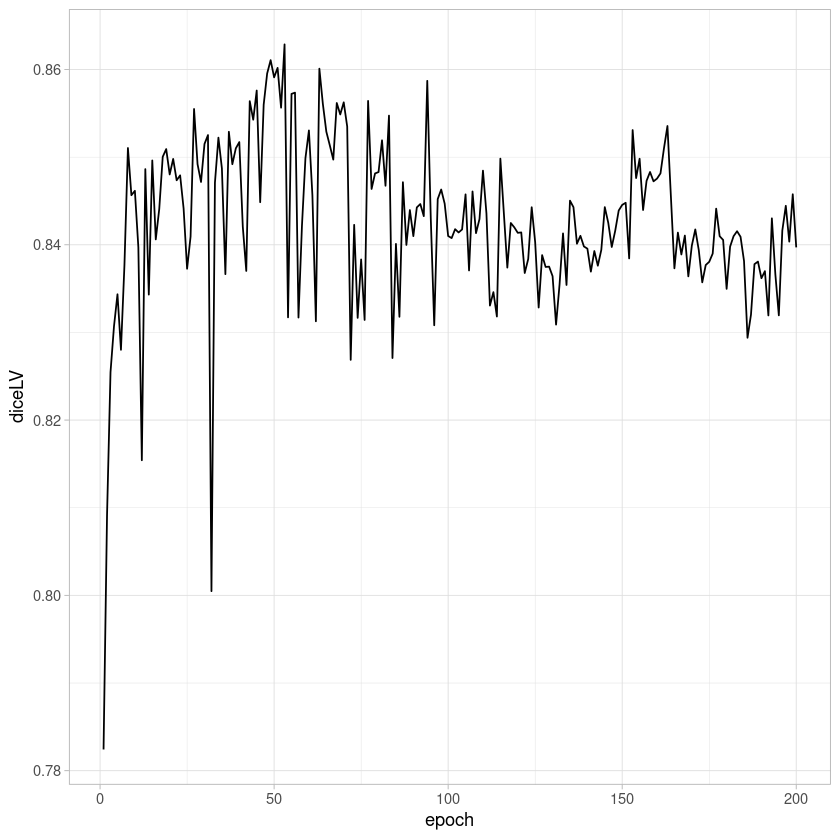

In [5]:
data %>% ggplot(aes(x=epoch, y=diceLV)) + geom_line()

In [6]:
options(repr.plot.res = 200, repr.plot.width = 12)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



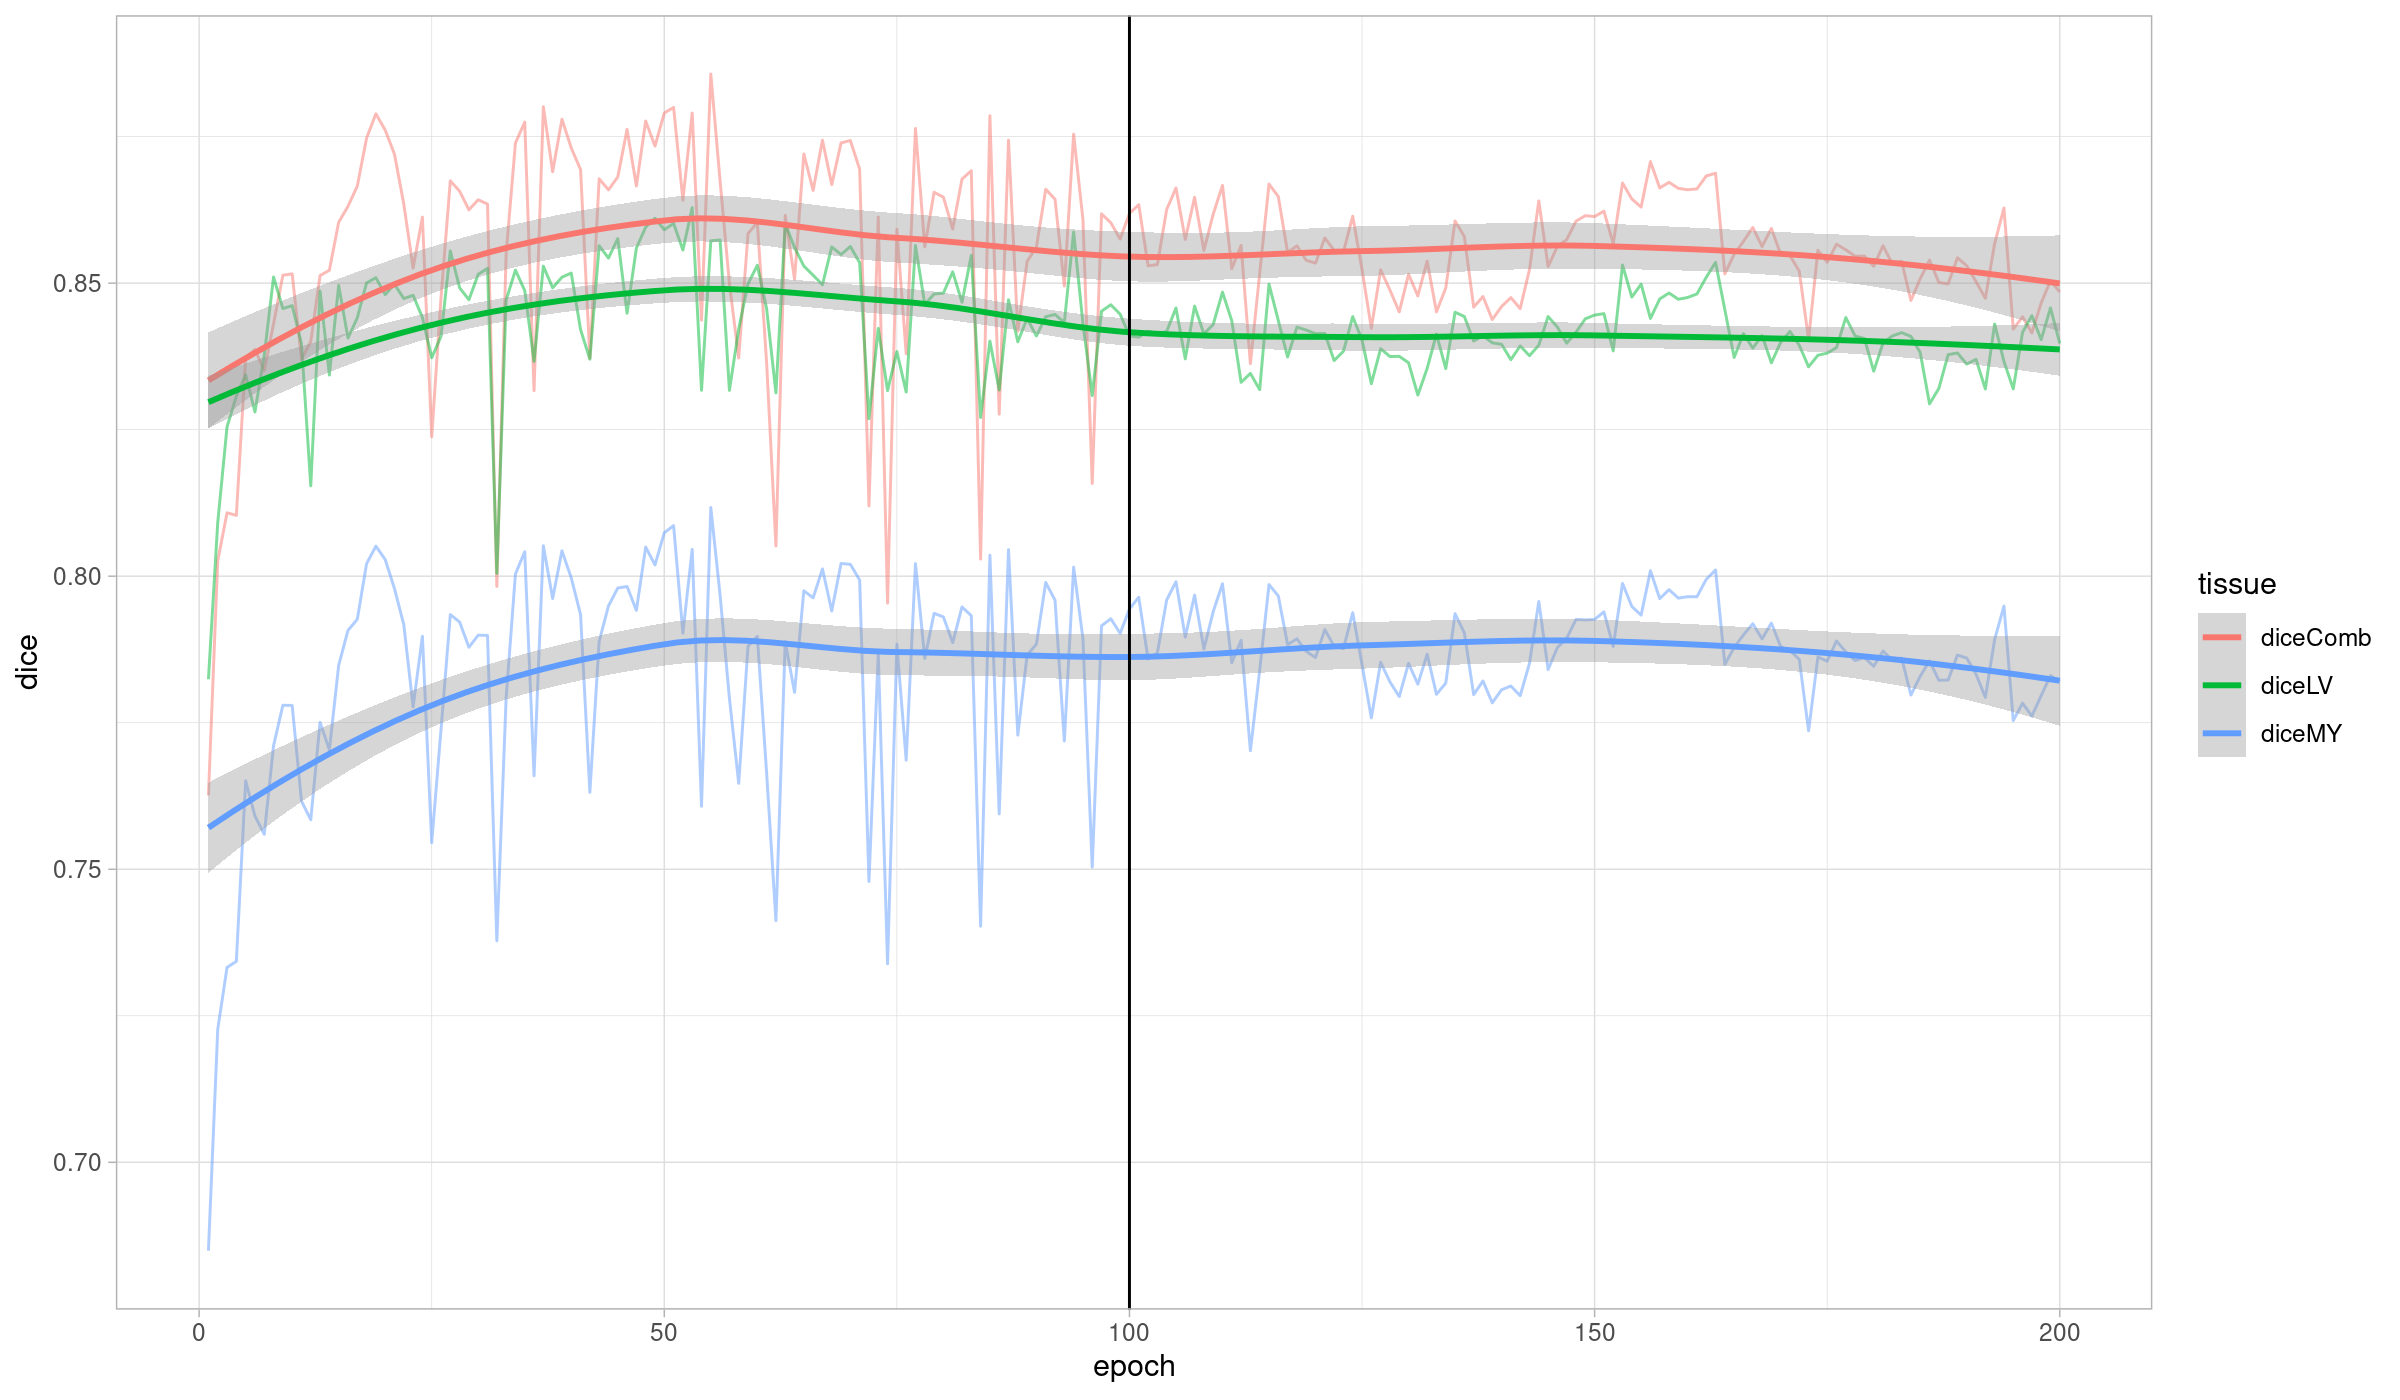

In [7]:
data %>%
    pivot_longer(names_to="tissue",values_to="dice",starts_with("dice")) %>%
    ggplot(aes(epoch, dice, color=tissue)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        geom_vline(xintercept = 100, col="black")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



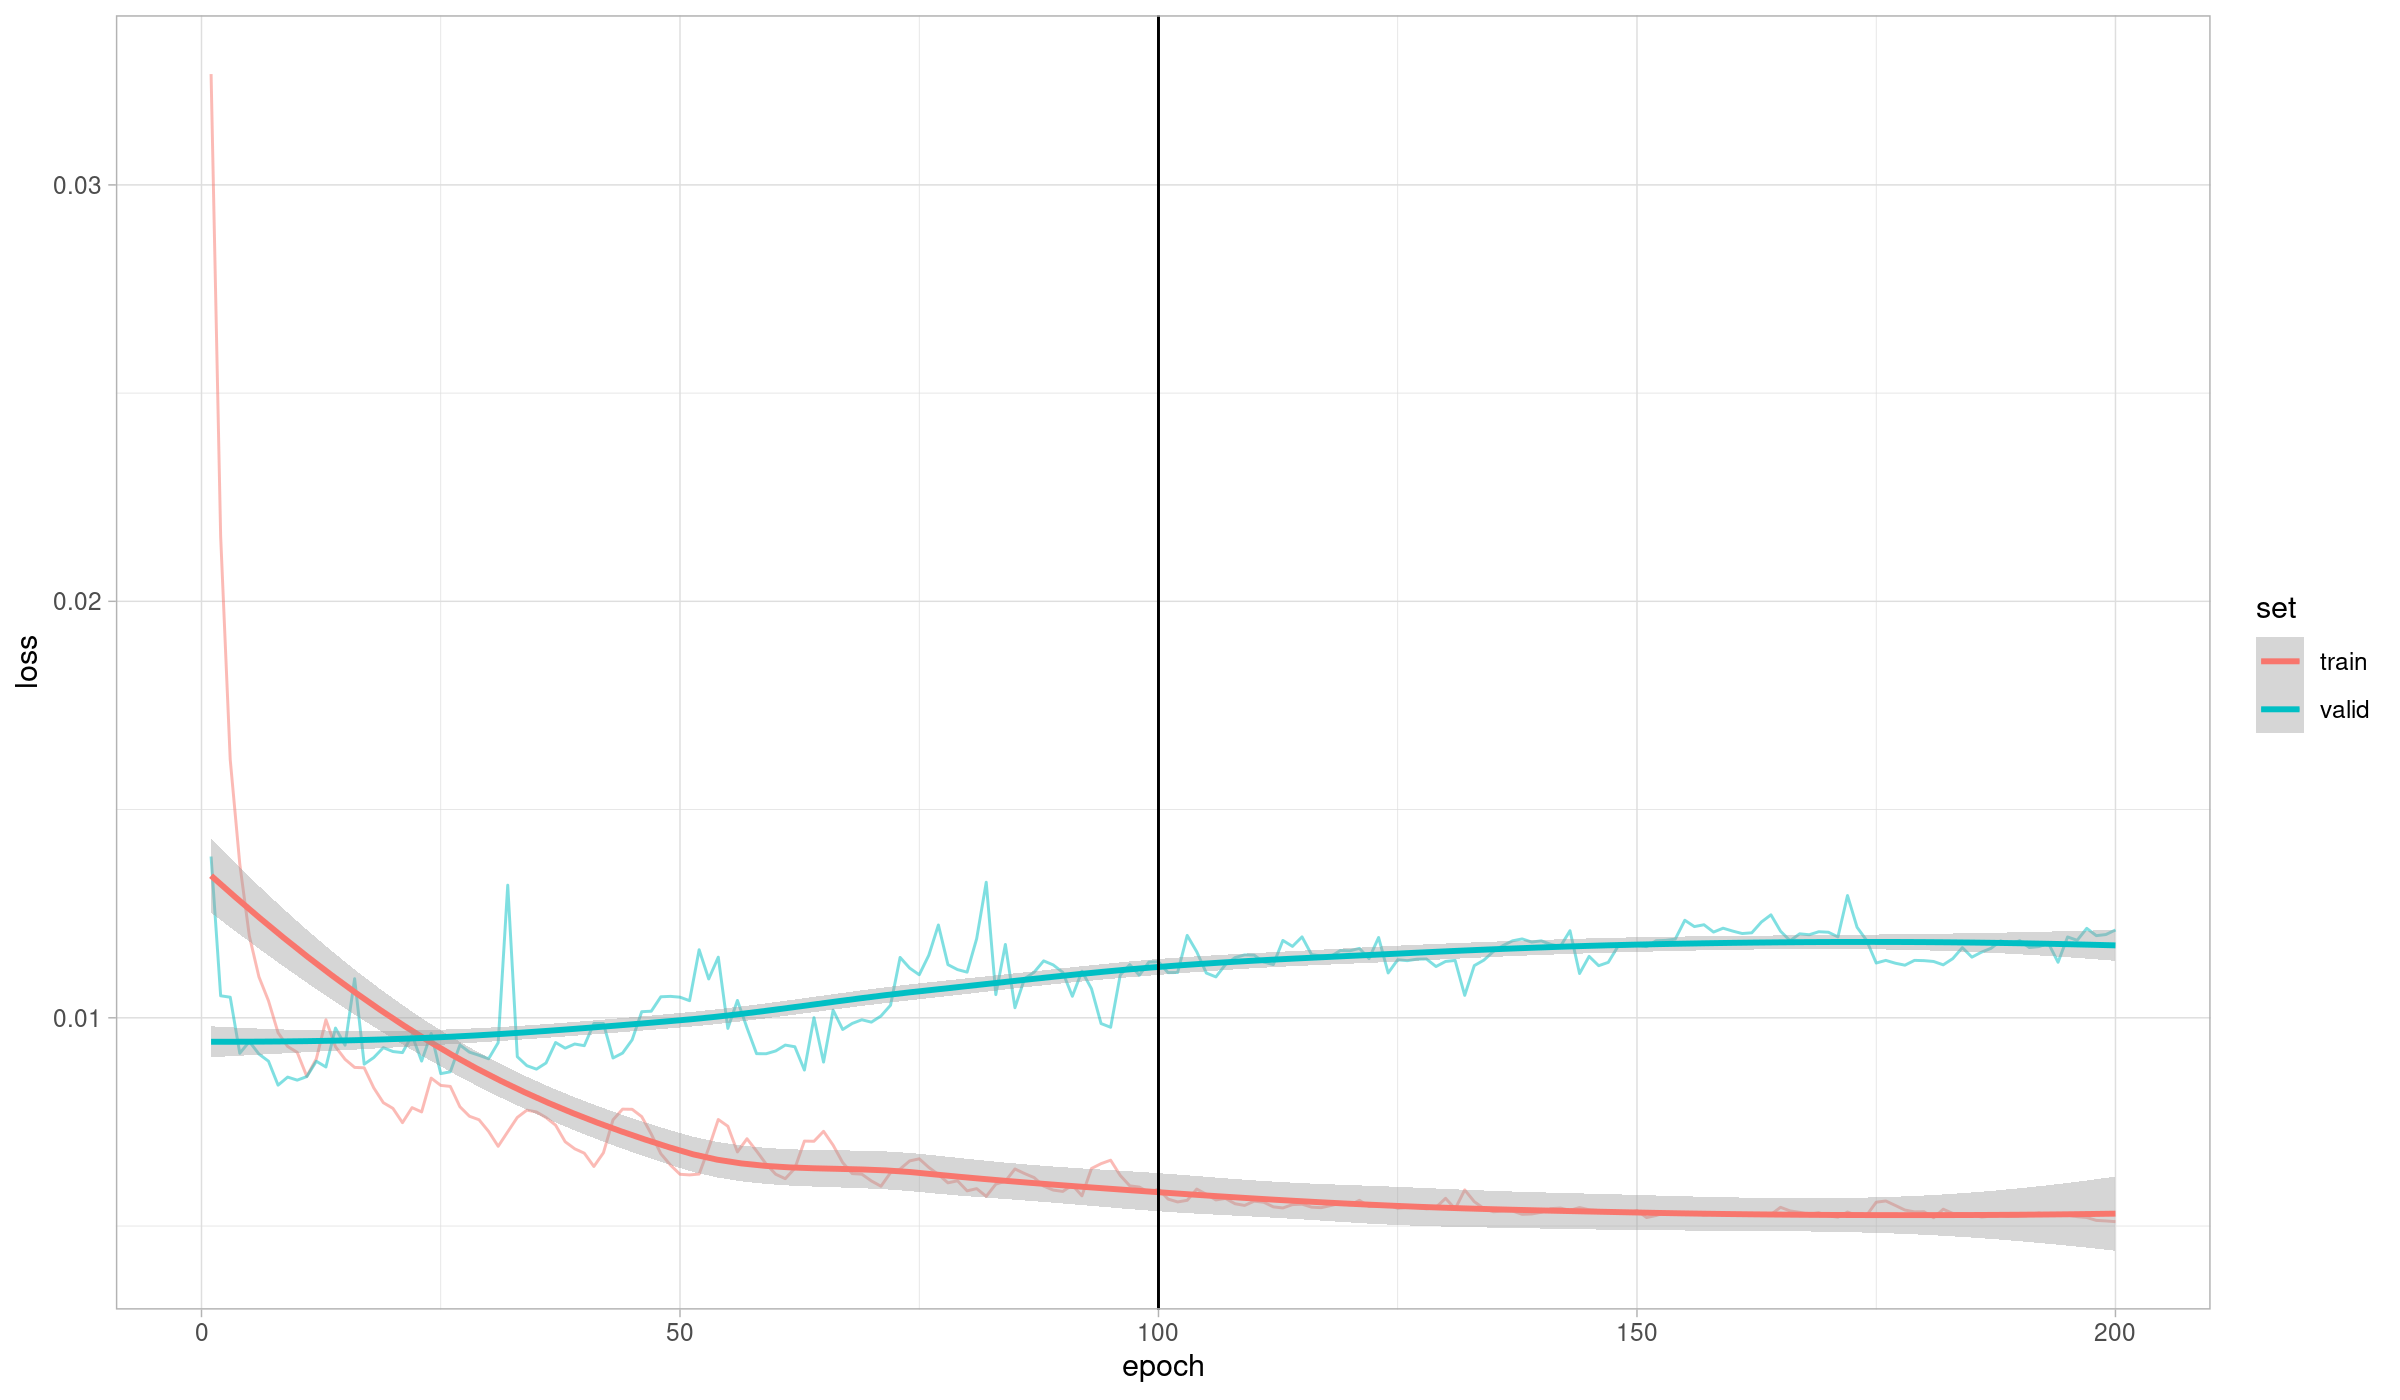

In [8]:
data %>%
    pivot_longer(names_to="set",values_to="loss",contains("loss")) %>%
    mutate(set = str_remove(set, "_loss")) %>%
    ggplot(aes(epoch, loss, color=set)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        geom_vline(xintercept = 100, col="black") +
        #ylim(0,.02) +
        NULL

In [9]:
data %>% filter(epoch%%10==0) %>% arrange(-diceLV)

epoch,train_loss,valid_loss,acc_seg,diceComb,diceLV,diceMY,time
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>
50,0.006241748,0.010495018,0.9965909,0.8790252,0.8591055,0.8074189,00:14:00
70,0.006081857,0.009895264,0.9966428,0.8743265,0.8562530,0.8020242,00:14:00
60,0.006243044,0.009203690,0.9965574,0.8603626,0.8530465,0.7897095,00:14:00
40,0.006748504,0.009329902,0.9965689,0.8730509,0.8517177,0.7997041,00:14:00
30,0.007270688,0.009015978,0.9965034,0.8642220,0.8515071,0.7899385,00:14:00
110,0.005596346,0.011504129,0.9966350,0.8666633,0.8484589,0.7987094,00:14:00
80,0.005844429,0.011096303,0.9965942,0.8646730,0.8482966,0.7930478,00:14:00
20,0.007825050,0.009189770,0.9966035,0.8761080,0.8480268,0.8028471,00:14:00
160,0.005264561,0.012082214,0.9966589,0.8659291,0.8475484,0.7965004,00:14:00


The best performance is achieved after 50 epochs. So this is the model to use for further analyses and evaluation.